In [1]:
import pandas as pd
import numpy as np

In [2]:
data1 = pd.read_csv("../data/data1.csv")

In [67]:
brand_num = data1.groupby(['category_id']).agg({'brand':"count"})
brand_num

,brand
category_id,
1487580004807082827,106
1487580004832248652,68561
1487580004857414477,82025
1487580004882580302,0
1487580004916134735,0
...,...
2222113024708182273,0
2235524494015856752,0
2235524499216793855,2930


In [68]:
def turn_percentage(x):
    return '%.2f%%' % (x * 100);

In [69]:
data3 = data1.groupby(['category_id', 'event_type']).agg({'event_type':'count'})
data3

event_type
category_id         event_type                  
1487580004807082827 cart                      11
                    purchase                   4
                    remove_from_cart           3
                    view                      93
1487580004832248652 cart                   19460
...                                          ...
2235524499636224267 view                    3070
2242903426784559183 cart                      20
                    purchase                   4
                    remove_from_cart          12
                    view                     175

[1938 rows x 1 columns]

In [70]:
data3 = data3.unstack()
data3.reset_index(inplace=True)

In [71]:
#### data3 = data1.groupby(['category_id', 'event_type']).agg({'event_type':'count'})
### brand_num = data1.groupby(['category_id']).agg({'brand':"count"})


### data3 = data3.unstack()
### data3.reset_index(inplace=True)
data3.columns = ["category_id","cart","purchase","remove_from_cart","view"]

brand_num.reset_index(inplace=True)

data3= data3.fillna(0)

data3["View-Cart%"] = (data3["cart"]/data3["view"]).apply(turn_percentage)
data3["Cart-Purchase%"] = (data3["purchase"]/data3["cart"]).apply(turn_percentage)
data3["View-Purchase%"] = (data3["purchase"]/data3["view"]).apply(turn_percentage)
data3["Cart-Remove%"] = (data3["remove_from_cart"]/data3["view"]).apply(turn_percentage)

data3["View-Cart"] = data3["cart"]/data3["view"]
data3["Cart-Purchase"] = data3["purchase"]/data3["cart"]
data3["View-Purchase"] = data3["purchase"]/data3["view"]
data3["Cart-Remove"] = data3["remove_from_cart"]/data3["view"]

data3 = pd.merge(data3, brand_num, how="inner", on = "category_id")

data3

,category_id,cart,purchase,remove_from_cart,view,View-Cart%,Cart-Purchase%,View-Purchase%,Cart-Remove%,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,brand
0,1487580004807082827,11.0,4.0,3.0,93.0,11.83%,36.36%,4.30%,3.23%,0.118280,0.363636,0.043011,0.032258,106
1,1487580004832248652,19460.0,2957.0,15979.0,30514.0,63.77%,15.20%,9.69%,52.37%,0.637740,0.151953,0.096906,0.523661,68561
2,1487580004857414477,23586.0,3860.0,23421.0,31771.0,74.24%,16.37%,12.15%,73.72%,0.742375,0.163656,0.121494,0.737182,82025
3,1487580004882580302,16739.0,3157.0,13341.0,23051.0,72.62%,18.86%,13.70%,57.88%,0.726172,0.188601,0.136957,0.578760,0
4,1487580004916134735,74701.0,15112.0,65763.0,89701.0,83.28%,20.23%,16.85%,73.31%,0.832778,0.202300,0.168471,0.733136,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520,2222113024708182273,52.0,12.0,35.0,1440.0,3.61%,23.08%,0.83%,2.43%,0.036111,0.230769,0.008333,0.024306,0
521,2235524494015856752,342.0,63.0,216.0,915.0,37.38%,18.42%,6.89%,23.61%,0.373770,0.184211,0.068852,0.236066,0
522,2235524499216793855,262.0,44.0,168.0,2822.0,9.28%,16.79%,1.56%,5.95%,0.092842,0.167939,0.015592,0.059532,2930
523,2235524499636224267,666.0,152.0,260.0,3070.0,21.69%,22.82%,4.95%,8.47%,0.216938,0.228228,0.049511,0.084691,178


In [72]:
data_category = data3

In [73]:
data_category_cluster = pd.DataFrame(data_category["View-Cart"])
data_category_cluster["Cart-Purchase"] = data_category["Cart-Purchase"]
data_category_cluster["View-Purchase"] = data_category["View-Purchase"]
data_category_cluster["Cart-Remove"] = data_category["Cart-Remove"]

In [74]:
data_category_cluster = data_category_cluster.replace([np.inf], 1)
data_category_cluster = data_category_cluster.replace([np.nan], 0)

In [75]:
data_category_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,0.118280,0.363636,0.043011,0.032258
1,0.637740,0.151953,0.096906,0.523661
2,0.742375,0.163656,0.121494,0.737182
3,0.726172,0.188601,0.136957,0.578760
4,0.832778,0.202300,0.168471,0.733136
...,...,...,...,...
520,0.036111,0.230769,0.008333,0.024306
521,0.373770,0.184211,0.068852,0.236066
522,0.092842,0.167939,0.015592,0.059532
523,0.216938,0.228228,0.049511,0.084691


In [76]:
data_category_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
0,0.118280,0.363636,0.043011,0.032258
1,0.637740,0.151953,0.096906,0.523661
2,0.742375,0.163656,0.121494,0.737182
3,0.726172,0.188601,0.136957,0.578760
4,0.832778,0.202300,0.168471,0.733136
...,...,...,...,...
520,0.036111,0.230769,0.008333,0.024306
521,0.373770,0.184211,0.068852,0.236066
522,0.092842,0.167939,0.015592,0.059532
523,0.216938,0.228228,0.049511,0.084691


In [77]:
from sklearn.cluster import KMeans 
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt

from yellowbrick.cluster import KElbowVisualizer

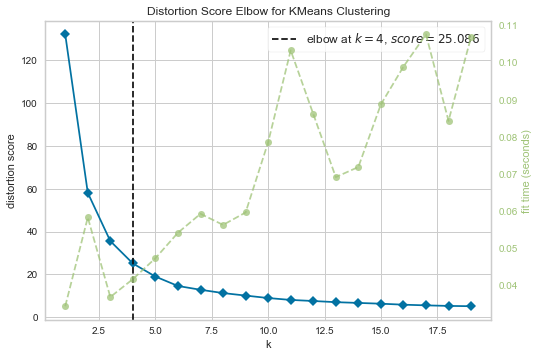

In [30]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,20))

visualizer.fit(data_category_cluster)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

## Apply K-Means on Full Dataset

In [78]:
kmeans = KMeans(n_clusters = 3, n_jobs = -1, verbose = 10)
data_pred_1 = kmeans.fit_predict(data_category_cluster)

In [79]:
category_label = pd.DataFrame(data_pred_1)

In [80]:
category_label["category_id"] = data3["category_id"]

In [81]:
category_label

,0,category_id
0,0,1487580004807082827
1,1,1487580004832248652
2,1,1487580004857414477
3,1,1487580004882580302
4,1,1487580004916134735
...,...,...
520,0,2222113024708182273
521,0,2235524494015856752
522,0,2235524499216793855
523,0,2235524499636224267


In [82]:
data_category_cluster["labels"] = category_label[0]

In [83]:
data_category_cluster["category_id"] = data3["category_id"]

In [84]:
data_category_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id
0,0.118280,0.363636,0.043011,0.032258,0,1487580004807082827
1,0.637740,0.151953,0.096906,0.523661,1,1487580004832248652
2,0.742375,0.163656,0.121494,0.737182,1,1487580004857414477
3,0.726172,0.188601,0.136957,0.578760,1,1487580004882580302
4,0.832778,0.202300,0.168471,0.733136,1,1487580004916134735
...,...,...,...,...,...,...
520,0.036111,0.230769,0.008333,0.024306,0,2222113024708182273
521,0.373770,0.184211,0.068852,0.236066,0,2235524494015856752
522,0.092842,0.167939,0.015592,0.059532,0,2235524499216793855
523,0.216938,0.228228,0.049511,0.084691,0,2235524499636224267


In [85]:
data_category_gp = data_category_cluster.groupby(["labels"]).agg({"View-Cart": "mean", "Cart-Purchase": "mean", "View-Purchase": "mean", "Cart-Remove": "mean"})

In [86]:
data_category_gp

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove
labels,,,,
0,0.203854,0.149933,0.039739,0.125680
1,0.636015,0.221876,0.139689,0.424804
2,1.281389,0.248056,0.320022,0.828249


- 0: Mid VC, High CP, Mid VP, Mid CR
- 1: low VC, low CP, low VP, low CR
- 2: High VC, High CP, High VP, High CR

- 0: Not Popular
- 1: Protential
- 2: Popular

In [87]:
data_category_cluster["labels"].replace({0: "Not Popular Category", 1: "Protential Popular Category", 2: "Popular Category"}, inplace=True)

In [88]:
category_label[0].replace({0: "Not Popular Category", 1: "Protential Popular Category", 2: "Popular Category"}, inplace=True)

In [ ]:
category_label["label"] = category_label[0]
del category_label[0]

In [94]:
category_label

,category_id,label
0,1487580004807082827,Not Popular Category
1,1487580004832248652,Protential Popular Category
2,1487580004857414477,Protential Popular Category
3,1487580004882580302,Protential Popular Category
4,1487580004916134735,Protential Popular Category
...,...,...
520,2222113024708182273,Not Popular Category
521,2235524494015856752,Not Popular Category
522,2235524499216793855,Not Popular Category
523,2235524499636224267,Not Popular Category


In [95]:
category_label.to_csv("category_label.csv")

In [96]:
data_category_cluster

,View-Cart,Cart-Purchase,View-Purchase,Cart-Remove,labels,category_id
0,0.118280,0.363636,0.043011,0.032258,Not Popular Category,1487580004807082827
1,0.637740,0.151953,0.096906,0.523661,Protential Popular Category,1487580004832248652
2,0.742375,0.163656,0.121494,0.737182,Protential Popular Category,1487580004857414477
3,0.726172,0.188601,0.136957,0.578760,Protential Popular Category,1487580004882580302
4,0.832778,0.202300,0.168471,0.733136,Protential Popular Category,1487580004916134735
...,...,...,...,...,...,...
520,0.036111,0.230769,0.008333,0.024306,Not Popular Category,2222113024708182273
521,0.373770,0.184211,0.068852,0.236066,Not Popular Category,2235524494015856752
522,0.092842,0.167939,0.015592,0.059532,Not Popular Category,2235524499216793855
523,0.216938,0.228228,0.049511,0.084691,Not Popular Category,2235524499636224267


In [97]:
data_category_cluster.to_csv("../data/category_cluster.csv")